19BCE2207-POLYNOMIAL REGRESSION-USER DEFINED

In [8]:
import numpy as np
 
import math
 
import matplotlib.pyplot as plt
 

In [28]:
class PolynomialRegression() :
     
    def __init__( self, degree, learning_rate, iterations ) :
         
        self.degree = degree
         
        self.learning_rate = learning_rate
         
        self.iterations = iterations
    def transform( self, X ) :
         
        
         
        X_transform = np.ones( ( self.m, 1 ) )
         
        j = 0
     
        for j in range( self.degree + 1 ) :
             
            if j != 0 :
                 
                x_pow = np.power( X, j )
                 
                
                 
                X_transform = np.append( X_transform, x_pow.reshape( -1, 1 ), axis = 1 )
 
        return X_transform  
    def normalize( self, X ) :
         
        X[:, 1:] = ( X[:, 1:] - np.mean( X[:, 1:], axis = 0 ) ) / np.std( X[:, 1:], axis = 0 )
         
        return X
    
    def fit( self, X, Y ) :
         
        self.X = X
     
        self.Y = Y
     
        self.m, self.n = self.X.shape
     

     
        self.W = np.zeros( self.degree + 1 )
         
        X_transform = self.transform( self.X )
         

         
        X_normalize = self.normalize( X_transform )
                 
        # gradient descent learning
     
        for i in range( self.iterations ) :
             
            h = self.predict( self.X )
         
            error = h - self.Y
             
            # update weights
         
            self.W = self.W - self.learning_rate * ( 1 / self.m ) * np.dot( X_normalize.T, error )
         
        return self     
    def predict( self, X ) :
      
         
        X_transform = self.transform( X )
         
        X_normalize = self.normalize( X_transform )
         
        return np.dot( X_transform, self.W )

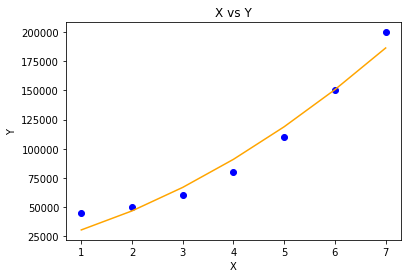

In [29]:
def main() :   
     
    # Create dataset
     
    X = np.array( [ [1], [2], [3], [4], [5], [6], [7] ] )
     
    Y = np.array( [ 45000, 50000, 60000, 80000, 110000, 150000, 200000 ] )
  
    # model training
     
    model = PolynomialRegression( degree = 2, learning_rate = 0.01, iterations = 500 )
 
    model.fit( X, Y )
     
    # Prediction on training set
 
    Y_pred = model.predict( X )
     
    # Visualization
     
    plt.scatter( X, Y, color = 'blue' )
     
    plt.plot( X, Y_pred, color = 'orange' )
     
    plt.title( 'X vs Y' )
     
    plt.xlabel( 'X' )
     
    plt.ylabel( 'Y' )
     
    plt.show()
if __name__ == "__main__" :
     
     main()